In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('restaurant_menu_optimization_data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [3]:
df['Profitability Number'] = df['Profitability'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Medium' else 2)

df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,Profitability Number
0,R003,Beverages,Soda,['confidential'],2.55,Low,0
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium,1
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High,2
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High,2
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium,1


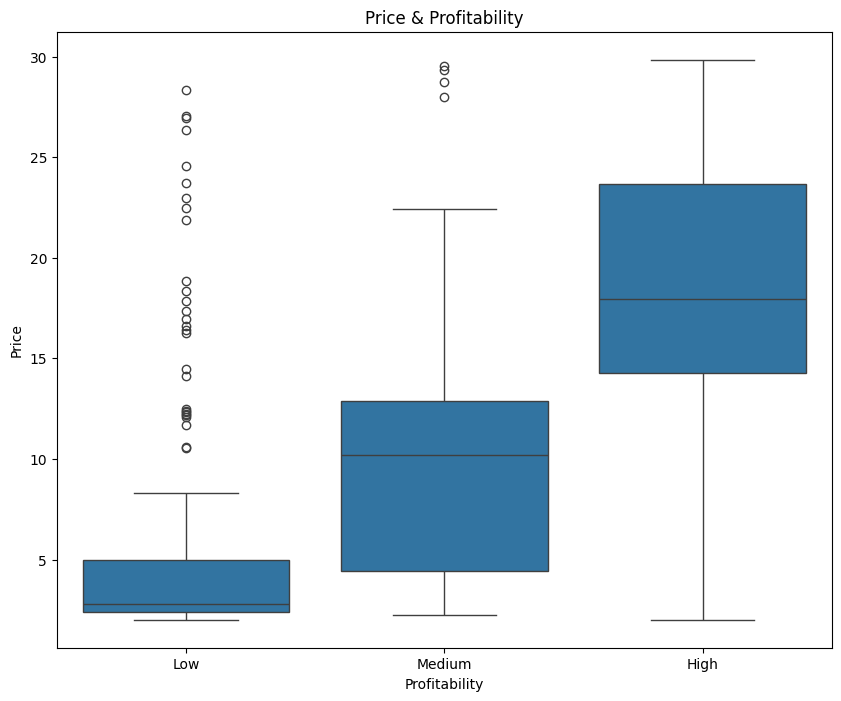

In [4]:
plt.figure(figsize=(10,8))
plt.title('Price & Profitability')
sns.boxplot(data=df, x='Profitability', y='Price')
plt.show()

In [5]:
df.duplicated().sum()

np.int64(27)

In [6]:
#Data Preprosesssing
df=df.dropna()
df
df=df.drop_duplicates()
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,Profitability Number
0,R003,Beverages,Soda,['confidential'],2.55,Low,0
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium,1
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High,2
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High,2
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium,1
...,...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low,0
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium,1
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High,2
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High,2


In [7]:
features = ['MenuCategory', 'Price']

X = df[features]
y = df['Profitability Number']

X.head()

,MenuCategory,Price
0,Beverages,2.55
1,Appetizers,11.12
2,Desserts,18.66
3,Main Course,29.55
4,Main Course,17.73


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

X_train.shape, X_test.shape

((778, 2), (195, 2))

In [9]:
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Added OrdinalEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# ... (Your existing code to load and prepare data)

# Apply OrdinalEncoder to categorical columns in the entire dataset X BEFORE splitting
categ_cols = X.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
X[categ_cols] = ordinal_encoder.fit_transform(X[categ_cols])

# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

# ... (Rest of your model training code)

models = [LogisticRegression, DecisionTreeClassifier, SVC]

for modelName in models:
    model = modelName(random_state=0)
    model.fit(X_train, y_train)  # Now the model should fit without the error
    y_pred = model.predict(X_test)
    cv_score = cross_val_score(model, X, y, cv=5)


    print(f'{modelName.__name__}:')
    print(f'Accuracy score: {model.score(X_test, y_test)}')
    print(f'CV score: {cv_score.mean()}')
    print(f'Classification report:\n{classification_report(y_test, y_pred)}\n')

LogisticRegression:
Accuracy score: 0.8256410256410256
CV score: 0.7923975680676711
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.82      0.93      0.87        95
           2       0.83      0.91      0.87        80

    accuracy                           0.83       195
   macro avg       0.55      0.61      0.58       195
weighted avg       0.74      0.83      0.78       195


DecisionTreeClassifier:
Accuracy score: 0.9025641025641026
CV score: 0.8540840602696272
Classification report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.97      0.96      0.96        95
           2       0.90      0.94      0.92        80

    accuracy                           0.90       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.90      0.90      0.90       195


SVC:
Accuracy scor

In [10]:
# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()
# Latih model Decision Tree pada data pelatihan
decision_tree.fit(X_train, y_train)
# Lakukan prediksi pada data pengujian
y_pred = decision_tree.predict(X_test)
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Cetak laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9025641025641026

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.97      0.96      0.96        95
           2       0.90      0.94      0.92        80

    accuracy                           0.90       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.90      0.90      0.90       195



In [11]:
# Ensure that you have trained your models
# Example models trained (assuming they have been previously fitted)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize and train models
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
svm = SVC()

# Fit models on training data (assuming X_train and y_train are defined)
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Print predictions (optional)
print("Logistic Regression Predictions:", y_pred_logreg)
print("Decision Tree Predictions:", y_pred_tree)
print("SVM Predictions:", y_pred_svm)

Logistic Regression Predictions: [1 2 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2
 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 1 2 2
 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 2 1 1 2 1 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 2 1 1 1 1 2 1
 2 1 2 2 2 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2
 2 1 1 1 1 2 2 1 2 1]
Decision Tree Predictions: [1 1 2 2 0 2 1 2 2 1 1 1 0 1 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 0 1 2 0 2 2 2 2
 2 1 0 2 2 2 0 1 1 1 1 0 1 0 2 2 1 2 0 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2
 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 0 2 1 1 1 1 1 1 1 1 0 1 2 2
 2 1 0 1 2 1 1 2 1 2 1 1 2 2 1 0 2 1 1 1 2 1 1 2 2 2 0 2 1 1 2 1 1 0 1 2 0
 2 1 2 2 2 1 2 2 1 0 1 1 2 2 1 2 1 1 1 0 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2
 2 2 1 1 1 2 2 1 2 1]
SVM Predictions: [1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 1 1 2 1 2 2 2 2
 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 1 1

In [12]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_linreg = metrics.mean_absolute_error(y_test, y_pred_logreg)
mse_linreg = metrics.mean_squared_error(y_test, y_pred_logreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = metrics.r2_score(y_test, y_pred_logreg)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_linreg}')
print(f'Mean Squared Error (MSE): {mse_linreg}')
print(f'Root Mean Squared Error (RMSE): {rmse_linreg}')
print(f'R-squared (R2): {r2_linreg}')

Mean Absolute Error (MAE): 0.2153846153846154
Mean Squared Error (MSE): 0.29743589743589743
Root Mean Squared Error (RMSE): 0.5453768398418634
R-squared (R2): 0.2886792452830187


In [13]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = metrics.r2_score(y_test, y_pred_tree)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_tree}')
print(f'Mean Squared Error (MSE): {mse_tree}')
print(f'Root Mean Squared Error (RMSE): {rmse_tree}')
print(f'R-squared (R2): {r2_tree}')

Mean Absolute Error (MAE): 0.15897435897435896
Mean Squared Error (MSE): 0.28205128205128205
Root Mean Squared Error (RMSE): 0.5310850045437944
R-squared (R2): 0.3254716981132074


In [14]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_svm = metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svm = metrics.mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = metrics.r2_score(y_test, y_pred_svm)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_svm}')
print(f'Mean Squared Error (MSE): {mse_svm}')
print(f'Root Mean Squared Error (RMSE): {rmse_svm}')
print(f'R-squared (R2): {r2_svm}')

Mean Absolute Error (MAE): 0.2205128205128205
Mean Squared Error (MSE): 0.2923076923076923
Root Mean Squared Error (RMSE): 0.5406548735632486
R-squared (R2): 0.30094339622641497


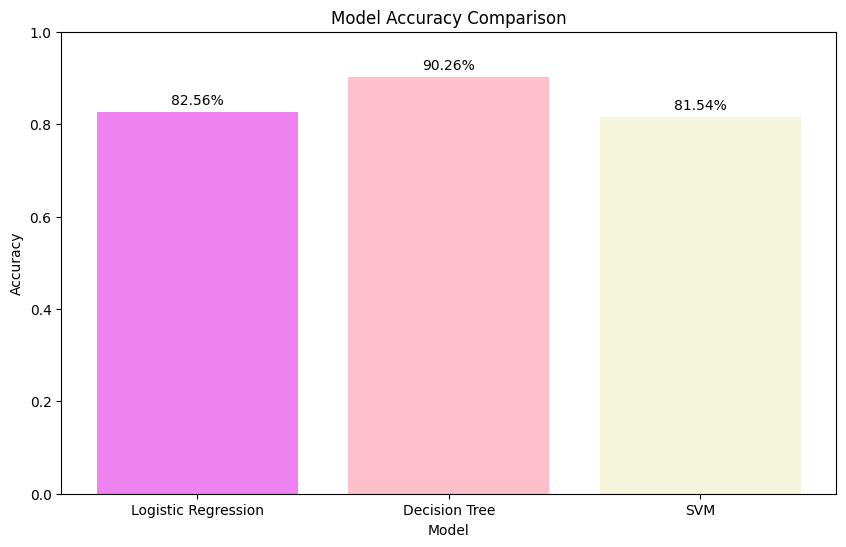

In [15]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
from sklearn.metrics import accuracy_score

accuracy_linreg = accuracy_score(y_test, y_pred_logreg)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

plt.show()
# Model names and accuracies
models = ['Logistic Regression', 'Decision Tree', 'SVM']
accuracies = [accuracy_linreg, accuracy_tree, accuracy_svm]

# Create bar plot
plt.figure(figsize=(10, 6))
bars= plt.bar(models, accuracies, color=['violet', 'pink', 'beige'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
# Adding accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval * 100:.2f}%', ha='center', va='bottom')

plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Example parameter grids
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Logistic Regression
logreg = LogisticRegression()
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train, y_train)
logreg_best_model = logreg_grid_search.best_estimator_

# SVM
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(tree_model, tree_param_grid, cv=5, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
tree_best_model = tree_grid_search.best_estimator_

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Melakukan K-Fold Cross-Validation dengan 10 lipatan
k_fold_scores = cross_val_score(model, X, y, cv=10)

# Menampilkan skor akurasi dari setiap lipatan
print("Cross-Validation Scores:", k_fold_scores)

# Menghitung dan menampilkan rata-rata skor akurasi
print("Average Accuracy:", np.mean(k_fold_scores))


Cross-Validation Scores: [0.76530612 0.84693878 0.83673469 0.82474227 0.8556701  0.82474227
 0.82474227 0.80412371 0.77319588 0.78350515]
Average Accuracy: 0.8139701241321271


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Melakukan K-Fold Cross-Validation dengan 10 lipatan
k_fold_scores = cross_val_score(model, X, y, cv=10)

# Menampilkan skor akurasi dari setiap lipatan
print("Cross-Validation Scores:", k_fold_scores)

# Menghitung dan menampilkan rata-rata skor akurasi
print("Average Accuracy:", np.mean(k_fold_scores))


Cross-Validation Scores: [0.76530612 0.84693878 0.83673469 0.82474227 0.8556701  0.82474227
 0.82474227 0.80412371 0.77319588 0.78350515]
Average Accuracy: 0.8139701241321271


In [19]:
import pickle

# The best SVM model after hyperparameter tuning and cross-validation
best_tree_model = decision_tree

# Define the filename for the saved model
filename = 'resto_model.sav'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(best_tree_model, file)

print(f"Best Desicion Tree model saved as {filename}")

Best Desicion Tree model saved as resto_model.sav
